El objetivo principal del análisis exploratorio de datos es descubrir patrones, tendencias, relaciones y valores atípicos potenciales en los datos. Para lograr esto, se requiere la exploración y visualización exhaustiva de los datos utilizando diversas técnicas, lo que nos permite comprender mejor su estructura y distribución. La realización de este análisis nos permite obtener una visión más precisa y detallada de la naturaleza de los datos necesarios, lo que a su vez puede ayudarnos a realizar proyectos y tomar decisiones informadas.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [58]:
df_train = pd.read_csv('disp_st6ns1.txt.bz2', compression="bz2", index_col=0)
pd.set_option('display.max_columns', None)
df_train.head(3650)

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.0,234.401764,229.968914,234.719940,254.104944,255.286532,0.0,10.000000,180.000000,490.000000,326.363636,102228.053977,102374.235795,102232.823153,101765.694602,101681.864347,6.242829,6.954545,7.569890,7.681818,7.927869,0.002250,0.002197,0.002482,0.002582,0.002546,0.000000,0.000909,0.000909,0.012727,0.015455,0.001173,0.001855,0.001882,0.011055,0.014409,277.989785,275.545629,281.609580,284.245322,284.431277,275.391665,274.677163,274.676539,281.715143,280.094230,275.403797,275.548567,281.597326,284.248324,280.159956,273.369282,274.832203,287.590399,288.177906,277.245536,321.394958,315.977009,336.989763,398.046781,380.463043,241.789530,233.140839,237.578452,256.342403,245.431481,0,4.000000,41.636364,104.454545,71.636364,10116900
V2,0.000000,0.000909,0.127273,0.000909,0.0,276.634960,272.369578,268.436640,256.169015,246.565446,0.0,10.000000,153.636364,473.636364,324.545455,101237.345881,101445.642045,101789.610085,101749.945312,102147.579545,8.607066,8.305498,8.913901,5.013589,5.233366,0.002870,0.002404,0.003123,0.002280,0.002117,0.156364,0.037273,0.049091,0.000000,0.000000,0.157891,0.038127,0.049545,0.000673,0.000555,279.558694,280.499734,282.373130,283.015775,283.025221,276.583460,279.423351,279.423351,282.422460,279.242898,279.573525,280.088570,282.368236,282.666554,279.245922,278.293648,278.924006,284.694425,284.870927,277.314348,329.523551,340.445582,350.524819,377.472312,366.501076,204.654873,226.094627,230.027276,248.015693,252.598371,0,3.818182,33.545455,99.272727,71.818182,9262800
V3,0.000000,0.000000,0.000000,0.000000,0.0,218.280002,218.450567,226.860365,255.074577,257.385585,0.0,10.000000,180.000000,490.909091,331.090909,102300.344460,102084.100852,101606.811080,101137.279830,101182.128551,4.890406,6.303983,7.763636,9.690909,9.981818,0.002326,0.002232,0.002372,0.002301,0.002445,0.000000,0.000000,0.003636,0.002727,0.008182,0.000382,0.001618,0.004300,0.002764,0.008427,273.907368,274.061609,281.467610,285.093148,285.315288,271.422397,270.662279,270.661896,281.640877,280.586515,271.456881,274.071555,281.441734,285.093689,280.610393,269.051242,272.963717,285.659995,287.622808,277.124598,304.821664,297.842871,323.796217,387.884591,375.769393,233.928381,228.465100,233.935296,255.359149,253.256739,0,4.000000,41.727273,105.000000,73.636364,10789800
V4,0.000000,0.000000,0.000000,0.000000,0.0,232.681230,208.987453,213.493584,236.729101,241.258593,0.0,20.000000,180.000000,502.727273,337.727273,102858.782670,102961.263494,102762.752841,102299.536932,102142.354403,3.462631,3.787141,4.726539,7.286358,9.511838,0.002348,0.002337,0.002201,0.001921,0.001856,0.000000,0.000000,0.000909,0.018182,0.000000,0.000627,0.000227,0.001800,0.017191,0.000755,279.932409,273.440552,277.859536,281.104914,281.508398,273.484572,272.160051,272.157801,277.961173,277.957520,273.503335,272.745711,277.877747,281.117004,278.551009,272.224768,272.720975,285.145963,286.053497,276.391751,324.674608,308.488836,327.123660,387.025060,371.072865,236.603051,234.644049,238.489481,255.291218,249.140133,0,4.000000,44.000000,108.090909,74.909091,11816700
V5,0.000000,0.000000,0.000000,0.000000,0.0,248.980929,251.472505,

Hemos impreso las 76 columnas para poder ver los datos con más claridad. Las 75 variables primeras corresponden a los valores de varios parametros en el punto azul, realmente hay 15 variables pero cada una se calcula 5 veces al día por lo que hay un total de 75, la variables salida representa la energía eléctrica solar acumulada producida durante el día correspondiente y depende dde las demás variabels. 

In [59]:
df_train.columns

Index(['apcp_sf1_1', 'apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1', 'apcp_sf5_1',
       'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1',
       'dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1',
       'pres_ms1_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1', 'pres_ms5_1',
       'pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'pwat_ea5_1',
       'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1',
       'tcdc_ea1_1', 'tcdc_ea2_1', 'tcdc_ea3_1', 'tcdc_ea4_1', 'tcdc_ea5_1',
       'tcolc_e1_1', 'tcolc_e2_1', 'tcolc_e3_1', 'tcolc_e4_1', 'tcolc_e5_1',
       'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1',
       'tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1',
       'tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1',
       'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 'tmp_sfc5_1',
       'ulwrf_s1_1', 'ulwrf_s2_1', 'ulwrf_s3_1', 'ulwrf_s4_1', 'ulwrf_s5_1',

Como parte de este proyecto, se nos pide realizar un estudio sobre la correlación que existe entre las variable proporcionadas y la varible 'salida' cuyo valor numerico se proporciona tan solo para los 10 primeros años de estudio, para nosotros hallar la funcion que, a partir de las otras variables, predice un valor aproximado para salida, y probrar dicha funcion en los 2 años de estudio restantes.
Por ello, de momento nos vamos a fijar unicamente en la variable 'salida', ya que es la variable objetivo de nuestros datos.

In [60]:
df_train['salida'].describe()

count    4.380000e+03
mean     1.749081e+07
std      7.945135e+06
min      3.000000e+02
25%      1.135185e+07
50%      1.741605e+07
75%      2.459130e+07
max      3.225630e+07
Name: salida, dtype: float64

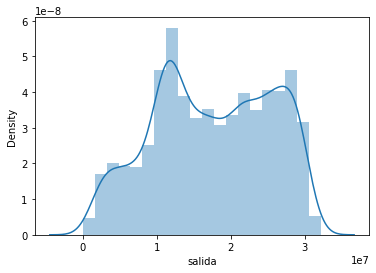

In [61]:
sns.distplot(df_train['salida']);

A simple vista podemos observar que hay una desviacion en relaciona a una distribucion normal. Tambien observamos que hay dos picos

In [62]:
# Asimetría y curtosis:

print("Skewness: %f" % df_train['salida'].skew())
print("Kurtosis: %f" % df_train['salida'].kurt())

Skewness: -0.125917
Kurtosis: -1.054102


Ahora vamos a estudiar la relacion de 'salida' con las otras variables proporcionadas. Tras entender lo que significa cada una de ellas y que cada una corresponde a una hora del día distinta, creemos que las variables que más influyen sobre el resultado de 'salida' son dswrf_sfc ya que se trata de la media del flujo radiativo de onda corta que llega desde el cielo a la sufercifie(descendiente), es decir, en donde se encuentran las plantas energéticas, ya que la radiacion de onda corta contiene un nivel más alto de energía que la de onda larga, y por lo tanto influye en mayor medida en 'salida'. En cuanto a la hora, creemos que el que más influye sería aquellas horas que corresponden a la tarde, pues es cuando la temperatura suele ser la más alta (2 y 3 correspondientes a las 15h y 18h).

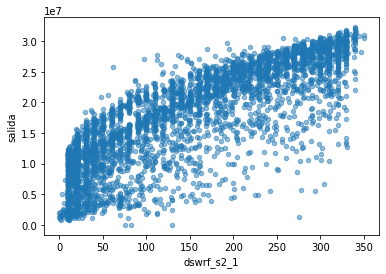

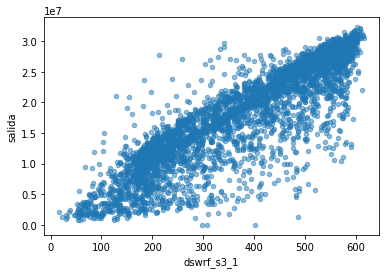

In [63]:
var1 = 'dswrf_s2_1'
var2 = 'dswrf_s3_1'
data = pd.concat([df_train['salida'], df_train[var1]], axis=1)
data.plot.scatter(x=var1, y='salida', alpha = 0.5);

data = pd.concat([df_train['salida'], df_train[var2]], axis=1)
data.plot.scatter(x=var2, y='salida', alpha = 0.5);

<Axes: >

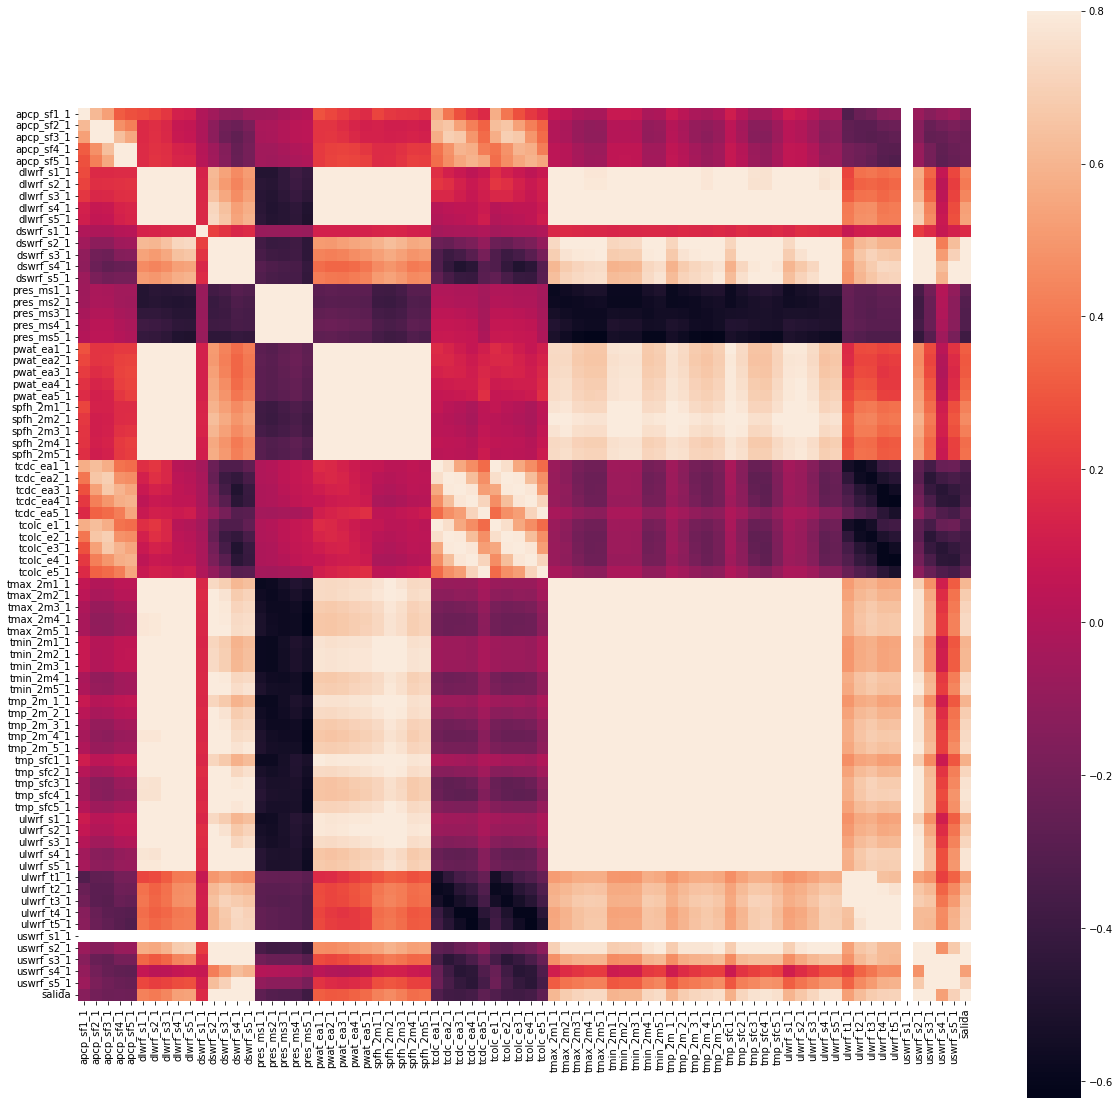

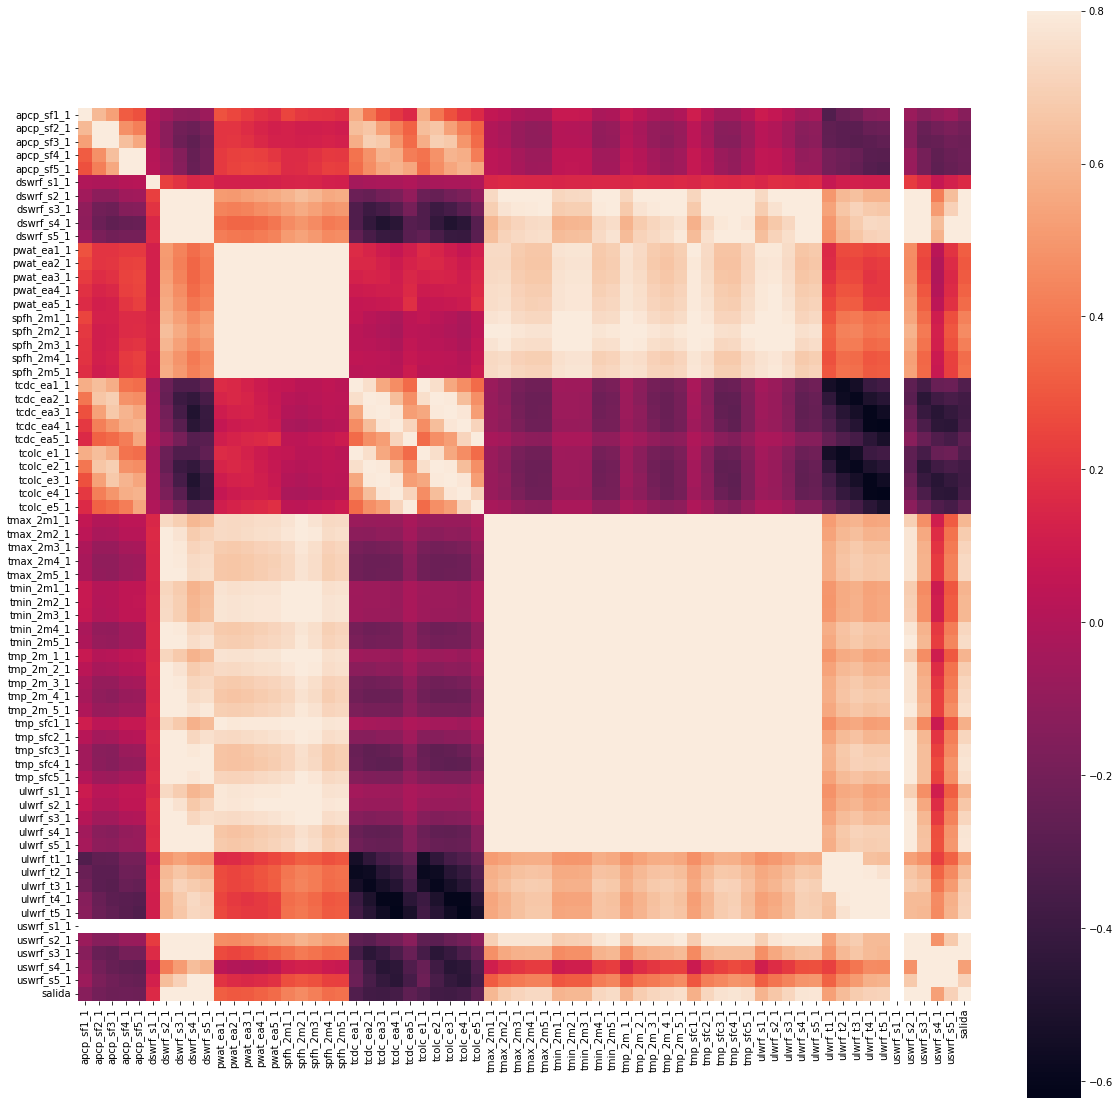

In [64]:
# Matriz de correlación:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, vmax=.8, square=True)

df_train = df_train.drop(["pres_ms1_1", "pres_ms2_1", "pres_ms3_1", "pres_ms4_1", "pres_ms5_1", 
                          "dlwrf_s1_1", "dlwrf_s2_1", "dlwrf_s3_1", "dlwrf_s4_1", "dlwrf_s5_1"], axis=1)

corrmat = df_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, vmax=.8, square=True)


En el primer heatmap se puede observar que existen varias variables con correlación muy alta, tanto positiva como negativa. Para evitar la presencia de datos dependientes, es conveniente eliminar aquellas variables que presentan una correlación elevada con otras. Para ello, se debe prestar atención a los cuadrados del heatmap que sean muy oscuros o muy blancos. Es importante tener en cuenta que una variable siempre tendrá una alta correlación consigo misma, por lo que debemos buscar aquellas variables distintas con alta correlación.

En este caso, las variables pres_msl y dlwrf presentan una alta correlación positiva/negativa con tmax, por lo que se eliminan. Tras realizar este proceso, en el segundo heatmap se observa que ya no existen dependencias entre las variables, excepto la correlación alta consigo mismas.

In [65]:
corr = df_train.corr()
corr[['salida']].sort_values(by = 'salida',ascending = False).style.background_gradient()

,salida
salida,1.000000
dswrf_s3_1,0.877270
dswrf_s5_1,0.876034
dswrf_s4_1,0.873229
uswrf_s2_1,0.842086
dswrf_s2_1,0.829018
uswrf_s3_1,0.798940
ulwrf_s5_1,0.778697
tmp_sfc4_1,0.777438
ulwrf_s4_1,0.775706


En las matrices de correlacion se puede observar lo siguiente:
1. Las variables dswrf_sfc son las que más correlacion tienen con la varible 'salida' y se corresponden a la media de radiación de onda corta que llega del cielo en la superficie, más especificamente a las horas 2,3,4,5 (12h, 15h, 18h y 24h respectivamente)
2. Las variables uswrf_sfc que corresponde a la radiacion de onda corta que procede del suelo sobre la superficie a las horas 2 y 3 también tienen un alto nivel de correlación.
3. A la hora 5, la variable ulwrf_sfc que corresponde a la radiacion de onda larga que procede del suelo sobre la superficie tiene alta correlacion con salída.
